In [1]:
TTS_PATH = "/media/external/xavier/"

In [2]:
import os
import sys
sys.path.append(TTS_PATH) # set this if TTS is not installed globally
import glob
import librosa
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool
from matplotlib import pylab as plt
from collections import Counter
from TTS.datasets.preprocess import *
%matplotlib inline

In [3]:
#DATA_PATH = "/media/external/xavier/data/LJSpeech-1.1/"
DATA_PATH = "/media/external/xavier/data/temp/01/"
META_DATA = "metadata.csv"
NUM_PROC = 8

In [4]:
# use your own preprocessor at this stage - TTS/datasets/proprocess.py
items = ljspeech(DATA_PATH, META_DATA)
print(" > Number of audio files: {}".format(len(items)))

 > Number of audio files: 21587


In [5]:
# check wavs if exist
wav_files = []
for item in items:
    wav_file = item[1].strip()
    wav_files.append(wav_file)
    if not os.path.exists(wav_file):
        print(waf_path)

In [6]:
# show duplicate items
c = Counter(wav_files)
print([item for item, count in c.items() if count > 1])

[]


In [7]:
def load_item(item):
    file_name = item[1].strip()
    text = item[0].strip()
    audio = librosa.load(file_name, sr=None)
    sr = audio[1]
    audio = audio[0]
    audio_len = len(audio) / sr
    text_len = len(text)
    return file_name, text, text_len, audio, sr, audio_len

# This will take a while depending on size of dataset
if NUM_PROC == 1:
    data1 = []
    for m in tqdm(items):
        data1 += [load_item(m)]
else:
    with Pool(8) as p:
        data1 = list(tqdm(p.imap(load_item, items), total=len(items)))

/media/external/xavier/moz-venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [20]:
data = []
for d in data1:
    if d[2]>6 and d[2]<100 and d[-1]>0.5:
        data.append(d)

In [21]:
# count words in the dataset
w_count = Counter()
for item in tqdm(data):
    text = item[1].lower().strip()
    for word in text.split():
        w_count[word] += 1
print(" > Number of words: {}".format(len(w_count)))

/media/external/xavier/moz-venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



 > Number of words: 33514


In [22]:
text_vs_durs = {}  # text length vs audio duration
text_len_counter = Counter()  # number of sentences with the keyed length
for item in tqdm(data):
    text = item[1].lower().strip()
    text_len = len(text)
    text_len_counter[text_len] += 1
    audio_len = item[-1]
    try:
        text_vs_durs[text_len] += [audio_len]
    except:
        text_vs_durs[text_len] = [audio_len]

/media/external/xavier/moz-venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# text_len vs avg_audio_len, median_audio_len, std_audio_len
text_vs_avg = {}
text_vs_median = {}
text_vs_std = {}
for key, durs in text_vs_durs.items():
    text_vs_avg[key] = np.mean(durs)
    text_vs_median[key] = np.median(durs)
    text_vs_std[key] = np.std(durs)

### Avg audio length per char

In [24]:
for item in data:
    if item[-1] < 1:
        print(item)

('/media/external/xavier/data/temp/01/wavs/0aeae8dd0fafb773fc1b18e71fdcaf77.wav', 'Auslöser', 8, array([ 2.1362305e-04,  7.9345703e-04,  3.0517578e-05, ...,
       -2.5939941e-03, -2.5634766e-03, -2.5024414e-03], dtype=float32), 44100, 0.9019954648526077)
('/media/external/xavier/data/temp/01/wavs/3dba704136839af3f5602d9b8947063f.wav', 'herunter', 8, array([ 0.00161743,  0.00170898,  0.00189209, ..., -0.00198364,
       -0.00189209, -0.00177002], dtype=float32), 44100, 0.6539909297052154)
('/media/external/xavier/data/temp/01/wavs/246281cd335325b5a2d948c719cf9469.wav', 'Lichter', 7, array([7.3242188e-03, 7.7514648e-03, 8.4533691e-03, ..., 6.1035156e-05,
       3.0517578e-04, 7.3242188e-04], dtype=float32), 44100, 0.7639909297052154)
('/media/external/xavier/data/temp/01/wavs/45e61868e630ec872a4611686497f708.wav', 'Glühbirne', 9, array([-0.0017395 , -0.00152588, -0.00140381, ..., -0.00012207,
       -0.0005188 , -0.00039673], dtype=float32), 44100, 0.6789795918367347)
('/media/external/

       -1.6479492e-03, -1.7089844e-03, -1.7700195e-03], dtype=float32), 44100, 0.6879818594104309)
('/media/external/xavier/data/temp/01/wavs/9cfa1e69f507d007a516eb3e9f5074e2.wav', 'Chicago', 7, array([-1.2817383e-03, -5.1879883e-04, -6.4086914e-04, ...,
        1.4038086e-03, -6.1035156e-05,  1.2817383e-03], dtype=float32), 44100, 0.7539909297052154)
('/media/external/xavier/data/temp/01/wavs/a25b2dff7d13c650e6c7e6bfb3bba5a3.wav', 'Houston', 7, array([0.00296021, 0.00335693, 0.00320435, ..., 0.003479  , 0.0038147 ,
       0.00286865], dtype=float32), 44100, 0.5349886621315193)
('/media/external/xavier/data/temp/01/wavs/a1edff17ec0464c4c048d25d25bce75a.wav', 'San Diego', 9, array([0.00314331, 0.00280762, 0.00363159, ..., 0.00027466, 0.00045776,
       0.00021362], dtype=float32), 44100, 0.8889795918367347)
('/media/external/xavier/data/temp/01/wavs/fd9338593b1a5ec176616b8ebbb90d2c.wav', 'San Jose', 8, array([ 0.00332642,  0.00650024,  0.00012207, ..., -0.00463867,
       -0.00396729, -

       0.0078125 ], dtype=float32), 44100, 0.74)
('/media/external/xavier/data/temp/01/wavs/5bb3176354876f7a16b4f1386b49ba7c.wav', 'Schluss mit lustig!', 19, array([ 0.00634766,  0.0022583 , -0.00106812, ..., -0.00888062,
       -0.00912476, -0.00933838], dtype=float32), 44100, 0.9589795918367346)
('/media/external/xavier/data/temp/01/wavs/5182b338bdc0e55aef6fc66dc273f980.wav', 'Schnappen Sie die!', 18, array([-0.00653076, -0.00961304, -0.00823975, ..., -0.00253296,
       -0.00268555, -0.0027771 ], dtype=float32), 44100, 0.9619954648526077)
('/media/external/xavier/data/temp/01/wavs/7a229c7ea73a09075863716c2036f9f0.wav', 'Schweigen Sie!', 14, array([ 0.00323486,  0.00109863, -0.0022583 , ...,  0.01055908,
        0.01052856,  0.01052856], dtype=float32), 44100, 0.8679818594104308)
('/media/external/xavier/data/temp/01/wavs/29ce3668eaba5dd8774b657f6cf3d0f0.wav', 'Schönes Ding!', 13, array([-0.00323486, -0.00805664, -0.01071167, ...,  0.01318359,
        0.01290894,  0.01281738], dtype=

In [25]:
sec_per_chars = []
for item in data:
    text = item[1]
    dur = item[-1]
    sec_per_char = dur / len(text)
    sec_per_chars.append(sec_per_char)
# sec_per_char /= len(data)
# print(sec_per_char)

In [26]:
mean = np.mean(sec_per_chars)
std = np.std(sec_per_chars)
print(mean)
print(std)

0.07167285640946701
0.013200018561096597


In [27]:
dist = norm(mean, std)

# find irregular instances long or short voice durations
for item in data:
    text = item[1]
    dur = item[-1]
    sec_per_char = dur / len(text)
    pdf =norm.pdf(sec_per_char)
    if pdf < 0.39:
        print(item)

### Plot Dataset Statistics

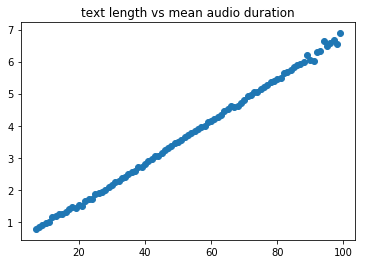

In [28]:
plt.title("text length vs mean audio duration")
plt.scatter(list(text_vs_avg.keys()), list(text_vs_avg.values()))

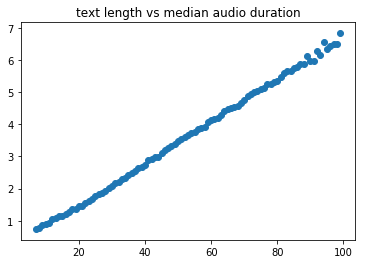

In [29]:
plt.title("text length vs median audio duration")
plt.scatter(list(text_vs_median.keys()), list(text_vs_median.values()))

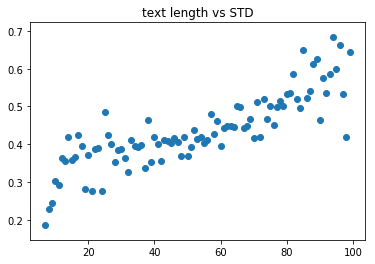

In [30]:
plt.title("text length vs STD")
plt.scatter(list(text_vs_std.keys()), list(text_vs_std.values()))

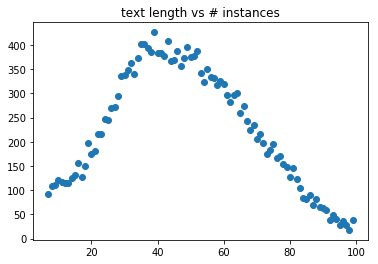

In [31]:
plt.title("text length vs # instances")
plt.scatter(list(text_len_counter.keys()), list(text_len_counter.values()))

### Check words frequencies

In [32]:
w_count_df = pd.DataFrame.from_dict(w_count, orient='index')
w_count_df.sort_values(0, ascending=False, inplace=True)

In [33]:
w_count_df

,0
die,4160
der,3179
ist,2459
das,2429
nicht,2006
...,...
schaumwein,1
nacken.,1
steifen,1
"woher,",1


In [34]:
# check a certain word
w_count_df.at['minute', 0]

8

In [35]:
w_count_df.at['die', 0]

4160

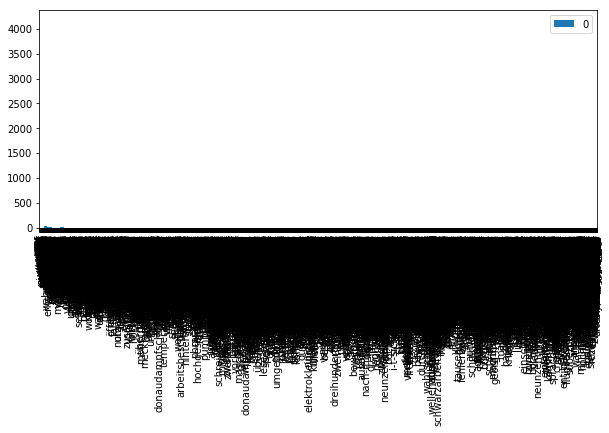

In [36]:
# fequency bar plot - it takes time!!
w_count_df.plot.bar(figsize=(10,4))

In [49]:
print(data[0][-1])

0.6129931972789116


In [52]:
cnt = 0
for item in data:
    if item[-1] < 2:
        print("rm", item[0])
        cnt += 1
print("cnt", cnt)

rm /media/external/xavier/data/temp/01/wavs/a939f2ca060905f79b40a8328d119b40.wav
rm /media/external/xavier/data/temp/01/wavs/d1bf93299de1b68e6d382c893bf1215f.wav
rm /media/external/xavier/data/temp/01/wavs/66fd1e244b230347f14d3410529d431c.wav
rm /media/external/xavier/data/temp/01/wavs/12092aa5e2e1c880d04f2e04a60eefdc.wav
rm /media/external/xavier/data/temp/01/wavs/f38241d8377942674b6ff921e63b1cdc.wav
rm /media/external/xavier/data/temp/01/wavs/e46bcd7de5f240143c55d7b77289d68a.wav
rm /media/external/xavier/data/temp/01/wavs/7cd316caca365a608669c56dab62fd50.wav
rm /media/external/xavier/data/temp/01/wavs/0aeae8dd0fafb773fc1b18e71fdcaf77.wav
rm /media/external/xavier/data/temp/01/wavs/b3209b1f6c20c07d10e5e6c8353c2d8e.wav
rm /media/external/xavier/data/temp/01/wavs/c377d7ffd108a8d656be585ab41c89e8.wav
rm /media/external/xavier/data/temp/01/wavs/3dba704136839af3f5602d9b8947063f.wav
rm /media/external/xavier/data/temp/01/wavs/1463d2d32e09289fbf52dad848ee3ec7.wav
rm /media/external/xavier/da

rm /media/external/xavier/data/temp/01/wavs/71827185ced9039cac7b465993ba30e9.wav
rm /media/external/xavier/data/temp/01/wavs/157b9411165560f68ed1a30a6f137add.wav
rm /media/external/xavier/data/temp/01/wavs/a35fd90a97992cdcb3e28e5f59867970.wav
rm /media/external/xavier/data/temp/01/wavs/b7e2ba0db9312a049c328d3b93449e08.wav
rm /media/external/xavier/data/temp/01/wavs/2c0ffc29b9be1e73962e63d36bea7a8c.wav
rm /media/external/xavier/data/temp/01/wavs/5c372a32c9ae748a4c040ebadc51a829.wav
rm /media/external/xavier/data/temp/01/wavs/ca3a4eccdf0176b658adfeaa10e15fbf.wav
rm /media/external/xavier/data/temp/01/wavs/087323b14ebe0f65777fa53345c80694.wav
rm /media/external/xavier/data/temp/01/wavs/78d54c3876627adccf2f96b53f1e71cd.wav
rm /media/external/xavier/data/temp/01/wavs/7a960e0a29d0a25cc677bb11b0a60e39.wav
rm /media/external/xavier/data/temp/01/wavs/eedc18ce8c3cd817f5e321201de03a9f.wav
rm /media/external/xavier/data/temp/01/wavs/7849da8a436d36ff6b900fa04c9aaad8.wav
rm /media/external/xavier/da

rm /media/external/xavier/data/temp/01/wavs/889812849e4ccef0a155a3c4dd1338a6.wav
rm /media/external/xavier/data/temp/01/wavs/49fa201e17eb875bfa14e4a36f8f45f3.wav
rm /media/external/xavier/data/temp/01/wavs/d590aa2132a0c6fc31bd36b1985697d4.wav
rm /media/external/xavier/data/temp/01/wavs/0c6e3e540633458e8e55ab3c9458c8f0.wav
rm /media/external/xavier/data/temp/01/wavs/e7f4b95a6ceecb77f56258f226272800.wav
rm /media/external/xavier/data/temp/01/wavs/8456f6301ac9a2f0c6943ab188f38f47.wav
rm /media/external/xavier/data/temp/01/wavs/3e3226683fa452629eece7c5f44a664e.wav
rm /media/external/xavier/data/temp/01/wavs/104894e5b05507e093dd869a68cb099c.wav
rm /media/external/xavier/data/temp/01/wavs/9cadac0ba189ce77a5161ee09b168bb1.wav
rm /media/external/xavier/data/temp/01/wavs/8addf0670974ecf2fb40e9bb39c1568f.wav
rm /media/external/xavier/data/temp/01/wavs/831ca83cc3e3325a7f7dc4fa4a8416f0.wav
rm /media/external/xavier/data/temp/01/wavs/9a32975813ffdddd1e679ff47d767336.wav
rm /media/external/xavier/da

rm /media/external/xavier/data/temp/01/wavs/c74ca5aa027125a6a1b703480d12a79e.wav
rm /media/external/xavier/data/temp/01/wavs/95df4485d5c6d53aa3b952f6619291cd.wav
rm /media/external/xavier/data/temp/01/wavs/58a2c9d4c13ea52355708721ae380ff0.wav
rm /media/external/xavier/data/temp/01/wavs/f88c4310fca468e36ff934beaca4ed9b.wav
rm /media/external/xavier/data/temp/01/wavs/508d04d984878953347c340fdaa45df3.wav
rm /media/external/xavier/data/temp/01/wavs/7f38702e26852f11c91c4462285ac636.wav
rm /media/external/xavier/data/temp/01/wavs/ab59fb0a82926ecd3e08956557b127b8.wav
rm /media/external/xavier/data/temp/01/wavs/a7dffed0e586b89b80c5299e5524bd83.wav
rm /media/external/xavier/data/temp/01/wavs/8cfd514bb5e4b664750b89f08d57d682.wav
rm /media/external/xavier/data/temp/01/wavs/406df6678b09d81fd46d31f9840a6c4a.wav
rm /media/external/xavier/data/temp/01/wavs/5142f69eabb294182ca6d52ae2390013.wav
rm /media/external/xavier/data/temp/01/wavs/f192017e0f71cbfc5684e88dc0065f37.wav
rm /media/external/xavier/da

rm /media/external/xavier/data/temp/01/wavs/5b6139de504ba6fc783d1342eff1b676.wav
rm /media/external/xavier/data/temp/01/wavs/1830849cbf99c9e1edce75854bd52528.wav
rm /media/external/xavier/data/temp/01/wavs/a65175a69d5ea6bd455cbfe61ea364fa.wav
rm /media/external/xavier/data/temp/01/wavs/6adbd4f8304d0e972dda4c40b3cc7c10.wav
rm /media/external/xavier/data/temp/01/wavs/fe5b545b77244f8411b9f7c779ce2f39.wav
rm /media/external/xavier/data/temp/01/wavs/962c606efe0a672c194a8d559edd4a9e.wav
rm /media/external/xavier/data/temp/01/wavs/379d8c655aa336dbfc976f7e31602e61.wav
rm /media/external/xavier/data/temp/01/wavs/f7dd6a6db05e17e90b1070f2211461f9.wav
rm /media/external/xavier/data/temp/01/wavs/6614fecafb466968c5ee7dc308511610.wav
rm /media/external/xavier/data/temp/01/wavs/b07d6d6e56f415300ee745540194b4c6.wav
rm /media/external/xavier/data/temp/01/wavs/fa76486ce234aa9f8ef612a7781bb5e7.wav
rm /media/external/xavier/data/temp/01/wavs/8b0a46057e86b7eea9b6c18f1774d322.wav
rm /media/external/xavier/da

rm /media/external/xavier/data/temp/01/wavs/29368ce389f56e8d6882bfcd86aa83b1.wav
rm /media/external/xavier/data/temp/01/wavs/714f724c59935b76803fc577008f0f90.wav
rm /media/external/xavier/data/temp/01/wavs/4097579127da416fe57dad8ddd162ea1.wav
rm /media/external/xavier/data/temp/01/wavs/8f9d540058cc18d44220290df443aa05.wav
rm /media/external/xavier/data/temp/01/wavs/439f6a01f77703cef263932fb6f68fe6.wav
rm /media/external/xavier/data/temp/01/wavs/3330b7a1a32c95927ece5f595872737b.wav
rm /media/external/xavier/data/temp/01/wavs/89cdaffc8abd64800146baf3ed70b7cd.wav
rm /media/external/xavier/data/temp/01/wavs/4de12dd0fd485639d84f0ad93d1661df.wav
rm /media/external/xavier/data/temp/01/wavs/33f00f0788fa401f576350e8ae425510.wav
rm /media/external/xavier/data/temp/01/wavs/c88b578feb33b10e4017bd04ded68d9c.wav
rm /media/external/xavier/data/temp/01/wavs/8854b181a3884e51004a807b68cd2d64.wav
rm /media/external/xavier/data/temp/01/wavs/1910c7ff4e2def4080401802af5b6575.wav
rm /media/external/xavier/da

cnt 4059
